In [1]:
require "torch"
require "itorch"
require "cutorch"
require "nn"
require "cunn"
require "cudnn"
data = require "data"
helpers = require "helpers"

-- Load configuration
args = {conf = 'conf.json'}
opts = helpers.opts(args)

-- Initialize and normalize training and validation data
trainData = data.new(opts.train,
    opts.height, opts.width, opts.validationSubjects)
trainData:normalize(opts.mean, opts.std)
validateData = data.new(opts.validate,
    opts.height, opts.width, opts.validationSubjects, true)
validateData:normalize(opts.mean, opts.std)

Train	Height	Width	
4556	200	280	


Train	Height	Width	
1079	200	280	


In [6]:
-- Load network from file
model = 'out/2016-08-01-adam4/model_10000.t7'
net = torch.load(model)
modelName = string.match(model, '(.*)%.t7$')


10_93	1	


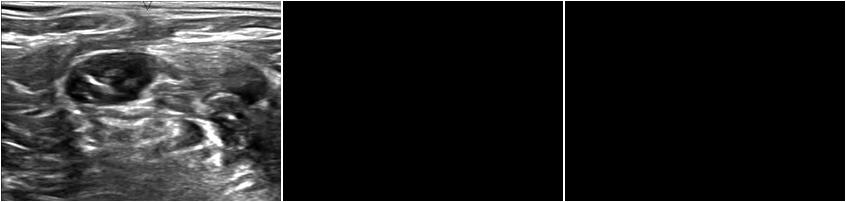

11_34	0.40047405706591	


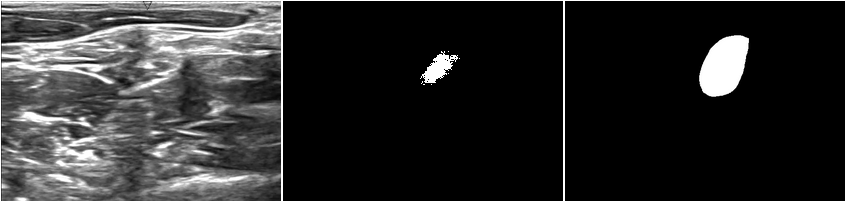

4_52	1	


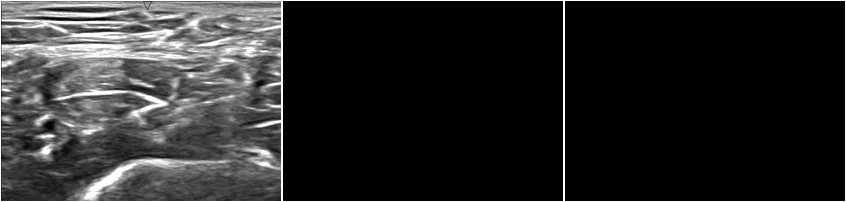

6_83	1	


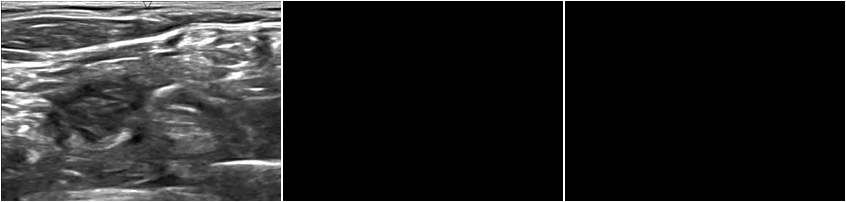

38_110	0.87236938509841	


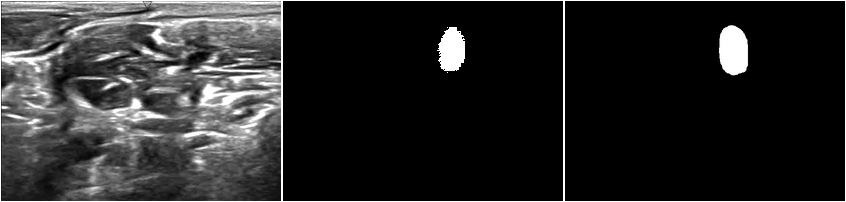

8_51	1	


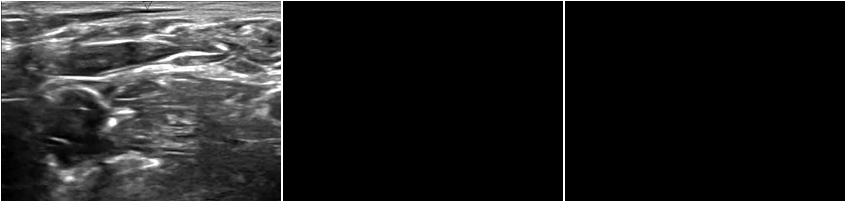

14_103	0.81371511569137	


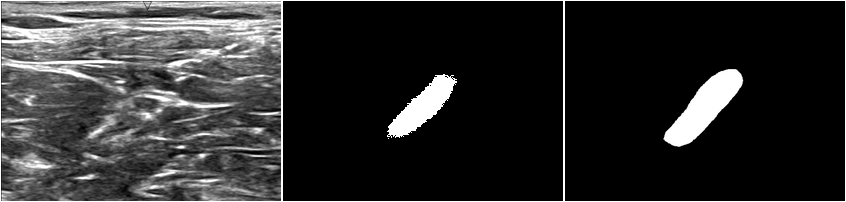

13_52	0	


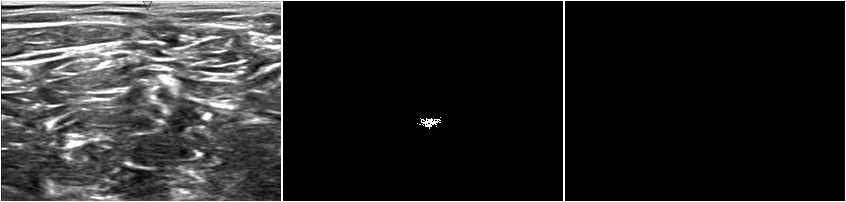


Mean Dice score for batch:	0.76081981973196	


In [10]:
-- Get a minibatch
local batch, names = trainData:batch(opts.batchSize)
local batchInputs = batch.inputs:cuda()
local batchLabels = batch.labels:cuda()

-- Forward pass and score
local outputs = net:forward(batchInputs)
local diceValue = helpers.dice(outputs, batchLabels)
local _, predLabels = outputs:max(2)
predLabels = predLabels:squeeze():double() - 1

-- Output
for j, name in pairs(names) do
    print(name, diceValue[j])
    itorch.image({batchInputs[j]*opts.std + opts.mean, predLabels[j], batchLabels[j] - 1})
end
print()
print("Mean Dice score for batch:", diceValue:mean())

42_11	0.84530417553086	


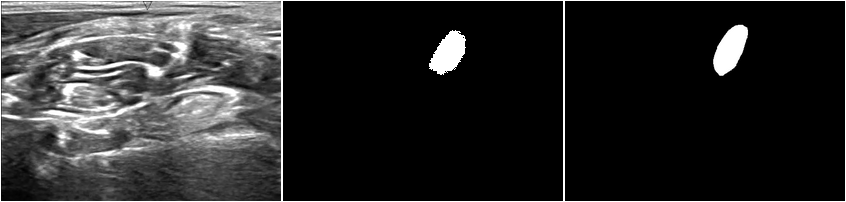

39_12	1	


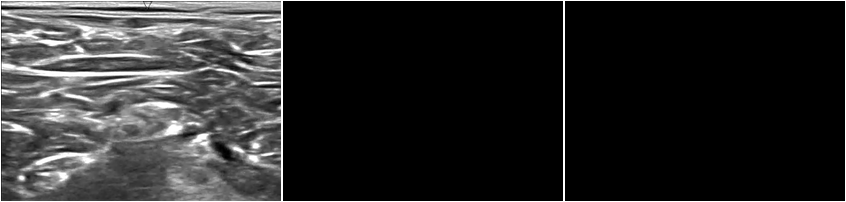

40_93	0	


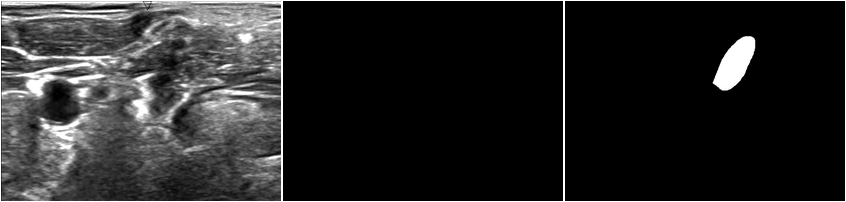

44_11	0.83227635801025	


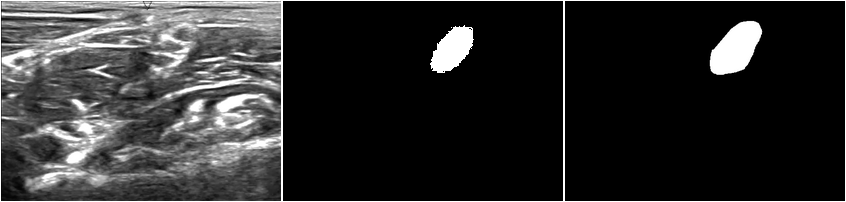

39_37	1	


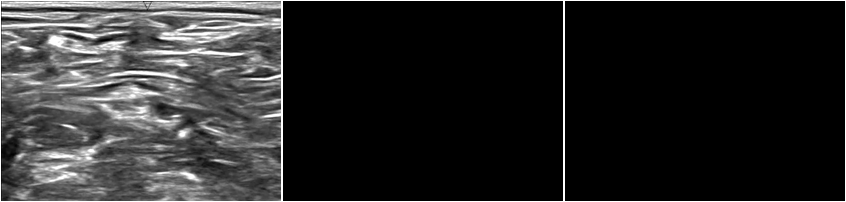

42_68	0.70640597468561	


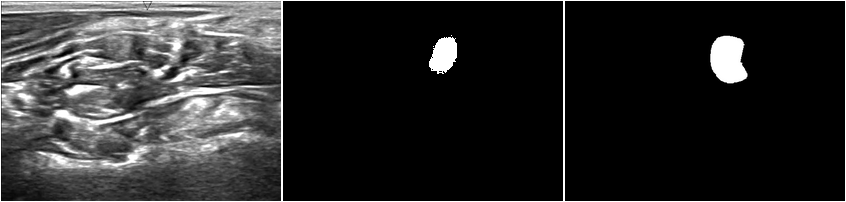

39_76	1	


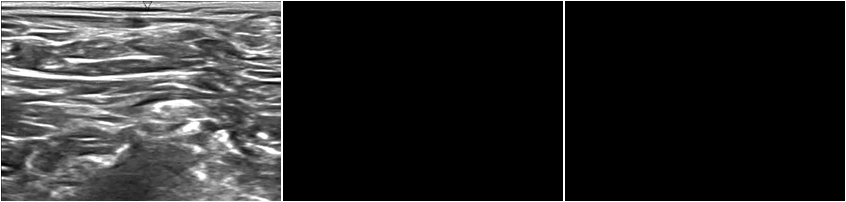

40_118	1	


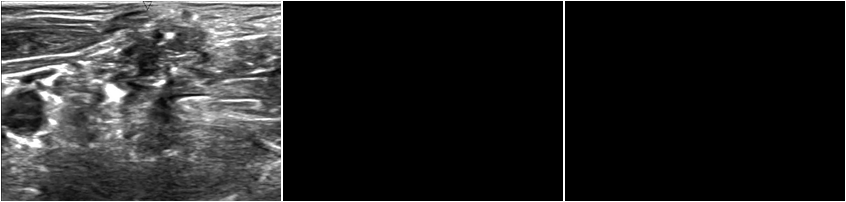


Mean Dice score for batch:	0.79799831352834	


In [14]:
-- Get a minibatch
local batch, names = validateData:batch(opts.batchSize)
local batchInputs = batch.inputs:cuda()
local batchLabels = batch.labels:cuda()

-- Forward pass and score
local outputs = net:forward(batchInputs)
local diceValue = helpers.dice(outputs, batchLabels)
local _, predLabels = outputs:max(2)
predLabels = predLabels:squeeze():double() - 1

-- Output
for j, name in pairs(names) do
    print(name, diceValue[j])
    itorch.image({batchInputs[j]*opts.std + opts.mean, predLabels[j], batchLabels[j] - 1})
end
print()
print("Mean Dice score for batch:", diceValue:mean())